## Borderline SMOTE

Here we will use Borderline SMOTE which is an extension of SMOTE to balance the classes and then will move forward with the modeling section.

In [33]:
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [8]:
df = pd.read_csv("../dataset/merged.csv")
df.drop(columns=["Time(ms)"], inplace=True)
df

,ankle_acc_hor_forward,ankle_acc_ver,ankle_acc_hor_lateral,upper_leg_acc_hor_forward,upper_leg_acc_ver,upper_leg_acc_hor_lateral,trunk_acc_hor_forward,trunk_acc_ver,trunk_acc_hor_lateral,annotation
0,-40,970,326,-36,962,242,320,657,349,0
1,-60,990,316,54,953,262,77,914,446,0
2,-111,980,346,-27,953,262,-48,857,446,0
3,-111,980,346,36,981,232,-38,800,446,0
4,-60,1009,346,18,972,242,77,866,436,0
...,...,...,...,...,...,...,...,...,...,...
1021876,-212,1000,376,690,-166,282,77,942,349,1
1021877,-232,970,356,572,-55,10,67,961,339,1
1021878,-232,970,356,272,92,-70,97,961,359,1
1021879,-252,921,346,354,18,-171,87,952,359,1


<AxesSubplot:xlabel='annotation', ylabel='count'>

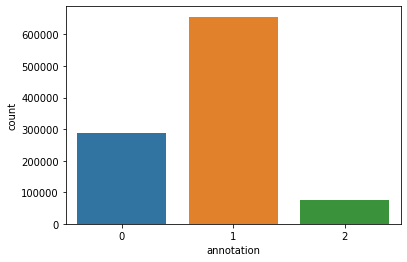

In [9]:
sns.countplot(x = 'annotation', data=df)

In [10]:
x = df.drop(columns=["annotation"])
y = df["annotation"]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)
bsmote = BorderlineSMOTE(random_state=42)
x_train_resampled, y_train_resampled = bsmote.fit_resample(x_train, y_train)

In [32]:
y_train_resampled.value_counts()

2    524990
1    524990
0    524990
Name: annotation, dtype: int64

In [17]:
params = {
    'max_depth': 500,
    'learning_rate': 0.01,
    'objective': 'multi:softmax',
    'num_class': 3
}
xgb = XGBClassifier(params)
xgb.fit(x_train_resampled, y_train_resampled)
y_pred = xgb.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

C:\Users\Dev\anaconda3\lib\site-packages\xgboost\core.py:430: FutureWarning: Pass `objective` as keyword args.  Passing these as positional arguments will be considered as error in future releases.
  warnings.warn(
C:\Users\Dev\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:35:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[ 46115  11094    754]
 [ 11957 112930   6254]
 [   458   8754   6061]]
              precision    recall  f1-score   support

           0       0.79      0.80      0.79     57963
           1       0.85      0.86      0.86    131141
           2       0.46      0.40      0.43     15273

    accuracy                           0.81    204377
   macro avg       0.70      0.68      0.69    204377
weighted avg       0.80      0.81      0.81    204377



In [18]:
model = DecisionTreeClassifier(random_state=42)
model.fit(x_train_resampled, y_train_resampled)
y_pred = model.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 47353   8797   1813]
 [ 11797 108429  10915]
 [  1568   6132   7573]]
              precision    recall  f1-score   support

           0       0.78      0.82      0.80     57963
           1       0.88      0.83      0.85    131141
           2       0.37      0.50      0.43     15273

    accuracy                           0.80    204377
   macro avg       0.68      0.71      0.69    204377
weighted avg       0.81      0.80      0.80    204377



In [21]:
model = RandomForestClassifier(n_estimators=10, random_state=42)
model.fit(x_train_resampled, y_train_resampled)
y_pred = model.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 50809   6004   1150]
 [  9474 113296   8371]
 [   885   5620   8768]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.85     57963
           1       0.91      0.86      0.88    131141
           2       0.48      0.57      0.52     15273

    accuracy                           0.85    204377
   macro avg       0.74      0.77      0.75    204377
weighted avg       0.85      0.85      0.85    204377



In [22]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train_resampled, y_train_resampled)
y_pred = model.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 50706   6084   1173]
 [  6774 115856   8511]
 [   522   4708  10043]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87     57963
           1       0.91      0.88      0.90    131141
           2       0.51      0.66      0.57     15273

    accuracy                           0.86    204377
   macro avg       0.77      0.81      0.78    204377
weighted avg       0.87      0.86      0.87    204377



In [23]:
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(x_train_resampled, y_train_resampled)
y_pred = model.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 50700   6087   1176]
 [  6603 116079   8459]
 [   504   4677  10092]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.88     57963
           1       0.92      0.89      0.90    131141
           2       0.51      0.66      0.58     15273

    accuracy                           0.87    204377
   macro avg       0.77      0.81      0.78    204377
weighted avg       0.87      0.87      0.87    204377



In [34]:
joblib.dump(model, '../model/model_rf.joblib')

['../model/model_rf.joblib']

## Interpretation of the above experiment 

We used Borderline SMOTE to oversample the training dataset so that the classes become balanced. After that we experimented with XGBoost, Decision Tree and Random Forest. From the experiments we found that the random forest model is the most stable one with precision and recall of the annotation 2 class being 51% and 66% respectively and the overall accuracy being 87%.

Now from here we can fine tune the model hyperparameters using GridSearchCV so as to increase the performance and the stability of the model. Due to time constraint here we will not be going forward with the GridSearchCV technique.

After that we will move to the deployment section where we will just display a basic deployment scenario showing the probability of freeze.